In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import re
import os
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 1000)

**Carpetas de entrada**

In [2]:
Ruta_data_procesada = '../../Data/data_procesada'
Ruta_data_procesada_full = r'C:\Users\jalvarez\OneDrive\Estudios\Programacion\Soy Henry Datos e IA\Dataft21\PG\Data\data_procesada'

## Simplificar "Dataset_Business_extendido"

Se creará otro dataframe con solo negocios de restaurantes y se quitará columnas inncesarias

In [3]:
# Demora 4 min. aprox.
Dataset_Business_extendido = pd.read_parquet(os.path.join(Ruta_data_procesada_full, "Dataset_Business_extendido.parquet"))

In [4]:
Dataset_Business_extendido.head(2)

,id_business,name,city,state,postal_code,latitude,longitude,stars,review_count,categories,hours_Dataset_Business,first_category,Descripcion_BusinessAtributos,Descripcion_BusinessCategorias,date,compliment_count
0,0,"Abby Rappoport, LAC, CMQ",Santa Barbara,California,93101,34.426679,-119.711197,5.0,7,"Doctors, Traditional Chinese Medicine, Naturopathic/Holistic, Acupuncture, Health & Medical, Nutritionists","{'Friday': '9:0-20:0', 'Monday': '9:0-20:0', 'Saturday': '8:30-15:30', 'Sunday': None, 'Thursday': '9:0-20:0', 'Tuesday': '9:0-20:0', 'Wednesday': '9:0-20:0'}",Doctors,ByAppointmentOnly,Doctors,None,NaN
1,0,"Abby Rappoport, LAC, CMQ",Santa Barbara,California,93101,34.426679,-119.711197,5.0,7,"Doctors, Traditional Chinese Medicine, Naturopathic/Holistic, Acupuncture, Health & Medical, Nutritionists","{'Friday': '9:0-20:0', 'Monday': '9:0-20:0', 'Saturday': '8:30-15:30', 'Sunday': None, 'Thursday': '9:0-20:0', 'Tuesday': '9:0-20:0', 'Wednesday': '9:0-20:0'}",Doctors,ByAppointmentOnly,Traditional Chinese Medicine,None,NaN


In [5]:
Dataset_Business_extendido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52612414 entries, 0 to 52612413
Data columns (total 16 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   id_business                     int64  
 1   name                            object 
 2   city                            object 
 3   state                           object 
 4   postal_code                     int64  
 5   latitude                        float64
 6   longitude                       float64
 7   stars                           float64
 8   review_count                    int64  
 9   categories                      object 
 10  hours_Dataset_Business          object 
 11  first_category                  object 
 12  Descripcion_BusinessAtributos   object 
 13  Descripcion_BusinessCategorias  object 
 14  date                            object 
 15  compliment_count                float64
dtypes: float64(4), int64(3), object(9)
memory usage: 6.3+ GB


In [6]:
# Agrupamos los establecimientos con el mismo nombre (son los mismos establecimientos) y nos quedamos con la primera categoría comomo 'first_category'
Dataset_Business_extendido = Dataset_Business_extendido.drop_duplicates(subset=['name'], keep='first')
Dataset_Business_extendido.head(3)

,id_business,name,city,state,postal_code,latitude,longitude,stars,review_count,categories,hours_Dataset_Business,first_category,Descripcion_BusinessAtributos,Descripcion_BusinessCategorias,date,compliment_count
0,0,"Abby Rappoport, LAC, CMQ",Santa Barbara,California,93101,34.426679,-119.711197,5.0,7,"Doctors, Traditional Chinese Medicine, Naturopathic/Holistic, Acupuncture, Health & Medical, Nutritionists","{'Friday': '9:0-20:0', 'Monday': '9:0-20:0', 'Saturday': '8:30-15:30', 'Sunday': None, 'Thursday': '9:0-20:0', 'Tuesday': '9:0-20:0', 'Wednesday': '9:0-20:0'}",Doctors,ByAppointmentOnly,Doctors,None,NaN
6,3,St Honore Pastries,Philadelphia,Pennsylvania,19107,39.955505,-75.155564,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, Bakeries","{'Friday': '7:0-21:0', 'Monday': '7:0-20:0', 'Saturday': '7:0-21:0', 'Sunday': '7:0-21:0', 'Thursday': '7:0-20:0', 'Tuesday': '7:0-20:0', 'Wednesday': '7:0-20:0'}",Restaurants,None,Synagogues,2017-09-20 17:00:27,0.0
146,4,Perkiomen Valley Brewery,Green Lane,Pennsylvania,18054,40.338183,-75.471659,4.5,13,"Brewpubs, Breweries, Food","{'Friday': '12:0-22:0', 'Monday': None, 'Saturday': '12:0-22:0', 'Sunday': '12:0-18:0', 'Thursday': '16:0-22:0', 'Tuesday': None, 'Wednesday': '14:0-22:0'}",Brewpubs,RestaurantsPriceRange2,Department Stores,2020-08-14 16:08:41,0.0


In [7]:
# Borramos algunas columnas por ya no ser necesarias
Dataset_Business_extendido.drop(columns=['categories', 'Descripcion_BusinessAtributos', 'Descripcion_BusinessCategorias', 'date', 'compliment_count'], inplace=True)
Dataset_Business_extendido.head(3)

,id_business,name,city,state,postal_code,latitude,longitude,stars,review_count,hours_Dataset_Business,first_category
0,0,"Abby Rappoport, LAC, CMQ",Santa Barbara,California,93101,34.426679,-119.711197,5.0,7,"{'Friday': '9:0-20:0', 'Monday': '9:0-20:0', 'Saturday': '8:30-15:30', 'Sunday': None, 'Thursday': '9:0-20:0', 'Tuesday': '9:0-20:0', 'Wednesday': '9:0-20:0'}",Doctors
6,3,St Honore Pastries,Philadelphia,Pennsylvania,19107,39.955505,-75.155564,4.0,80,"{'Friday': '7:0-21:0', 'Monday': '7:0-20:0', 'Saturday': '7:0-21:0', 'Sunday': '7:0-21:0', 'Thursday': '7:0-20:0', 'Tuesday': '7:0-20:0', 'Wednesday': '7:0-20:0'}",Restaurants
146,4,Perkiomen Valley Brewery,Green Lane,Pennsylvania,18054,40.338183,-75.471659,4.5,13,"{'Friday': '12:0-22:0', 'Monday': None, 'Saturday': '12:0-22:0', 'Sunday': '12:0-18:0', 'Thursday': '16:0-22:0', 'Tuesday': None, 'Wednesday': '14:0-22:0'}",Brewpubs


In [8]:
# Filtros para solo seleccionar negocios relacionados a restaurantes

categories_exclude = ['shopping', 'beauty', 'salon','Sports Bars','Pets', 'Pet Adoption', 'Nightlife','Gastropubs','Automotive','Custom Cakes', 'Desserts', 'Cupcakes', 'Ice Cream & Frozen Yogurt',
                      'Organic Stores', 'Health Markets', 'Grocery','Cupcakes', 'Street Vendors', 'Food Trucks','Acai Bowls','Home Services', 'Painters', 'Contractors', 'Pressure Washers', 'Shopping',
                      'Fences & Gates', 'Flooring', 'Home & Garden', 'Door Sales/Installation', 'Kitchen & Bath', 'Home Inspectors','Health & Medical', 'Pharmacy', 'Convenience Stores', 'Drugstores',
                      'Flowers & Gifts', 'Chocolatiers & Shops', 'Florists', 'Gift Shops', 'American (New)', 'Music Venues', 'Breakfast & Brunch', 'Arts & Entertainment', 'Bars', 'American (Traditional)',
                      'Dive Bars', 'Pool Halls','Farmers Market','Building Supplies', 'Masonry/Concrete', 'Countertop Installation','Active Life', 'Advertising', 'Afghan', 'African', 'Airport Terminals',
                      'Airports', 'American (New)', 'American (Traditional)', 'Amusement Parks', 'Water Delivery', 'Water Stores', 'Web Design', 'Wedding Planning', 'Wholesalers', 'Wine & Spirits',
                      'Wine Tasting Classes', 'Wine Tours', 'Wraps', 'Yelp Events', 'Walking Tours']
categories_include = ['Restaurants', 'restaurant', 'cafe', 'food', 'dining', 'eatery', 'bistro', 'bakery', 'grill', 'kitchen', 'pizzeria', 'steakhouse', 'sushi', 'Sushi Bars', 'tavern', 'diner',
                      'Pizza', 'Seafood', 'Food Trucks']

include_pattern = re.compile('|'.join(categories_include), flags=re.IGNORECASE)
exclude_pattern = re.compile('|'.join(categories_exclude), flags=re.IGNORECASE)

mask = Dataset_Business_extendido['first_category'].str.contains(include_pattern)
mask2 = Dataset_Business_extendido['first_category'].str.contains(exclude_pattern)

C:\Users\jalvarez\AppData\Local\Temp\ipykernel_19620\467335826.py:17: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask2 = Dataset_Business_extendido['first_category'].str.contains(exclude_pattern)


In [9]:
Business_simplificado = Dataset_Business_extendido[mask & ~mask2]
Business_simplificado.head(3)

,id_business,name,city,state,postal_code,latitude,longitude,stars,review_count,hours_Dataset_Business,first_category
6,3,St Honore Pastries,Philadelphia,Pennsylvania,19107,39.955505,-75.155564,4.0,80,"{'Friday': '7:0-21:0', 'Monday': '7:0-20:0', 'Saturday': '7:0-21:0', 'Sunday': '7:0-21:0', 'Thursday': '7:0-20:0', 'Tuesday': '7:0-20:0', 'Wednesday': '7:0-20:0'}",Restaurants
1513,14,Zio's Italian Market,Largo,Florida,33771,27.916116,-82.760461,4.5,100,"{'Friday': '10:0-20:0', 'Monday': '10:0-18:0', 'Saturday': '10:0-20:0', 'Sunday': None, 'Thursday': '10:0-20:0', 'Tuesday': '10:0-20:0', 'Wednesday': '10:0-20:0'}",Food
17041,23,Romano's Macaroni Grill,Reno,Nevada,89502,39.476117,-119.789339,2.5,339,"{'Friday': '11:0-21:0', 'Monday': '11:0-22:0', 'Saturday': '12:0-21:0', 'Sunday': '11:0-21:0', 'Thursday': '11:0-20:0', 'Tuesday': '11:0-22:0', 'Wednesday': '10:0-22:0'}",Restaurants


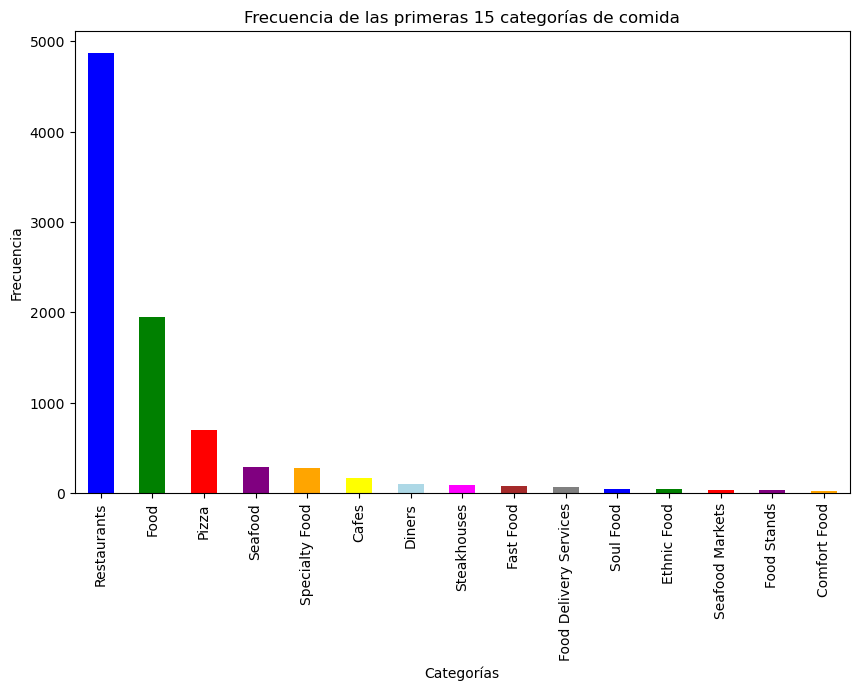

In [10]:
# Gráficos de categorias más frecuentes
category_counts = Business_simplificado['first_category'].value_counts().nlargest(15)

plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'LightBlue', 'magenta', 'brown', 'gray']
category_counts.plot(kind='bar', color=colors)
plt.title('Frecuencia de las primeras 15 categorías de comida')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.show()

In [11]:
# Exportamos a PARQUET
Business_simplificado.to_parquet(os.path.join(Ruta_data_procesada, "Dataset_Business_simplificado.parquet"))

## Simplificar "Dataset_Review_extendido"

Se creará otro dataframe con solo los reviews de restaurantes (y similares de negocios de comida) y se quitará columnas inncesarias

In [12]:
Dataset_Review_extendido = pd.read_parquet(os.path.join(Ruta_data_procesada_full, "Dataset_Review_extendido.parquet"))

In [13]:
Dataset_Review_extendido.head(1)

,user_id,stars_Dataset_Review,useful,funny,cool,text,id_review,id_user,id_business,anho,mes,dia,hora,name,address,city,state,postal_code,latitude,longitude,stars_Dataset_Business,review_count,is_open,attributes,categories,hours,yelp_id
0,mh_-eMZ6K5RLWhZyISBhwA,3.0,0,0,0,"If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.",0,124234,1867,2018,07,07,22:09:11,Turning Point of North Wales,1460 Bethlehem Pike,North Wales,Pennsylvania,19454,40.210196,-75.223639,3.0,169,1,"{'AcceptsInsurance': None, 'AgesAllowed': None, 'Alcohol': ''none'', 'Ambience': '{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': False, 'casual': True}', 'BYOB': None, 'BYOBCorkage': None, 'BestNights': None, 'BikeParking': 'False', 'BusinessAcceptsBitcoin': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}', 'ByAppointmentOnly': None, 'Caters': 'False', 'CoatCheck': None, 'Corkage': None, 'DietaryRestrictions': None, 'DogsAllowed': 'False', 'DriveThru': None, 'GoodForDancing': None, 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': False, 'brunch': True, 'breakfast': True}', 'HairSpecializesIn': None, 'HappyHour': 'False', 'HasTV': 'False', 'Music': None, 'NoiseLevel': 'u'average'', 'Open24Hours': None, 'OutdoorSeating': 'True', 'Restaurants...","Restaurants, Breakfast & Brunch, Food, Juice Bars & Smoothies, American (New), Coffee & Tea, Sandwiches","{'Friday': '7:30-15:0', 'Monday': '7:30-15:0', 'Saturday': '7:30-15:0', 'Sunday': '7:30-15:0', 'Thursday': '7:30-15:0', 'Tuesday': '7:30-15:0', 'Wednesday': '7:30-15:0'}",mh_-eMZ6K5RLWhZyISBhwA


In [14]:
Dataset_Review_extendido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3514973 entries, 0 to 3514972
Data columns (total 27 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 object 
 1   stars_Dataset_Review    float64
 2   useful                  int64  
 3   funny                   int64  
 4   cool                    int64  
 5   text                    object 
 6   id_review               int64  
 7   id_user                 int64  
 8   id_business             int64  
 9   anho                    object 
 10  mes                     object 
 11  dia                     object 
 12  hora                    object 
 13  name                    object 
 14  address                 object 
 15  city                    object 
 16  state                   object 
 17  postal_code             int64  
 18  latitude                float64
 19  longitude               float64
 20  stars_Dataset_Business  float64
 21  review_count            int64  

In [15]:
# Borramos algunas columnas por ya no ser necesarias
Dataset_Review_extendido.drop(columns=['useful', 'funny', 'cool', 'address', 'postal_code', 'latitude', 'longitude', 'is_open', 'attributes', 'categories', 'hours'], inplace=True)
Dataset_Review_extendido.head(1)

,user_id,stars_Dataset_Review,text,id_review,id_user,id_business,anho,mes,dia,hora,name,city,state,stars_Dataset_Business,review_count,yelp_id
0,mh_-eMZ6K5RLWhZyISBhwA,3.0,"If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.",0,124234,1867,2018,07,07,22:09:11,Turning Point of North Wales,North Wales,Pennsylvania,3.0,169,mh_-eMZ6K5RLWhZyISBhwA


In [16]:
# Filtramos para quedarnos solo con los reviews de restaurantes
Review_simplificado = Dataset_Review_extendido[Dataset_Review_extendido['id_business'].isin(Business_simplificado['id_business'])]
Dataset_Review_simplificado = pd.DataFrame(Review_simplificado)
Dataset_Review_simplificado.head(2)

,user_id,stars_Dataset_Review,text,id_review,id_user,id_business,anho,mes,dia,hora,name,city,state,stars_Dataset_Business,review_count,yelp_id
0,mh_-eMZ6K5RLWhZyISBhwA,3.0,"If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.",0,124234,1867,2018,07,07,22:09:11,Turning Point of North Wales,North Wales,Pennsylvania,3.0,169,mh_-eMZ6K5RLWhZyISBhwA
6,59MxRhNVhU9MYndMkz0wtw,3.0,"Had a party of 6 here for hibachi. Our waitress brought our separate sushi orders on one plate so we couldn't really tell who's was who's and forgot several items on an order. I understand making mistakes but the restaraunt was really quiet so we were kind of surprised. Usually hibachi is a fun lively experience and our cook said maybe three words, but he cooked very well his name was Francisco. Service was fishy, food was pretty good, and im hoping it was just an off night here. But for the money I wouldn't go back.",9,114367,14917,2016,07,25,07:31:06,Hibachi Steak House & Sushi Bar,Santa Barbara,California,3.5,488,59MxRhNVhU9MYndMkz0wtw


In [17]:
# Exportamos a PARQUET
Dataset_Review_simplificado.to_parquet(os.path.join(Ruta_data_procesada, "Dataset_Review_simplificado.parquet"))